In [97]:
!pip install summa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54387 sha256=a58741aedaaaa8c3cb63acb6263b2cd9e9fa282604f973a50909ab7a4fe02675
  Stored in directory: /root/.cache/pip/wheels/10/2d/7a/abce87c4ea233f8dcca0d99b740ac0257eced1f99a124a0e1f
Successfully built summa


In [1]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
import tensorflow as tf

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import summa

In [2]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

#1.전처리

In [3]:
data_org=data.copy()

In [242]:
summasumma="Tesla CEO Elon Musk has announced that the company's long-awaited Cybertruck will finally begin deliveries this year. Speaking during Tesla's earnings call, Musk said that the Cybertruck production is currently in its beta stage and mass production will commence in 2024. Originally unveiled in 2019, the futuristic electric pickup truck has faced multiple delays due to supply chain issues and design modifications. Musk emphasized that despite the challenges, the Cybertruck represents a significant leap forward in automotive innovation and is expected to set new benchmarks in the electric vehicle industry."

In [246]:
summarize(summasumma,words=20)

'Musk emphasized that despite the challenges, the Cybertruck represents a significant leap forward in automotive innovation and is expected to set new benchmarks in the electric vehicle industry.'

In [4]:
data

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...
...,...,...
98396,CRPF jawan axed to death by Maoists in Chhatti...,A CRPF jawan was on Tuesday axed to death with...
98397,First song from Sonakshi Sinha's 'Noor' titled...,"'Uff Yeh', the first song from the Sonakshi Si..."
98398,'The Matrix' film to get a reboot: Reports,"According to reports, a new version of the 199..."
98399,Snoop Dogg aims gun at clown dressed as Trump ...,A new music video shows rapper Snoop Dogg aimi...


In [4]:
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 98280


In [5]:
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data.drop_duplicates(subset = ['text'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


In [6]:
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


In [6]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [7]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "

In [8]:
data.reset_index(inplace=True,drop=True)

In [11]:
data.iloc[0]['text']

"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers."

In [60]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거, html아니면 그냥 text반환
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    # sentence = re.sub(r'(\d+)([a-zA-Z]+)', r'\1 \2', sentence)# 숫자 분리
    # sentence = re.sub(r'([a-zA-Z]+)(\d+)', r'\1 \2', sentence)# 숫자 분리
    sentence = re.sub(r'(\d+)\.\d+', r'\1', sentence) #float 정수로 바꾸기
    sentence = re.sub("[^a-zA-Z0-9]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환, 숫자 살림
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    sentence = re.sub(r'(?<=\d) (\d)', r'\1', sentence) #숫자 붙이기
    sentence = re.sub(r'(?<=\d)[a-zA-Z]+', '', sentence)  # 숫자 뒤에 붙은 문자 삭제
    sentence = re.sub(r'[a-zA-Z]+(?=\d)', '', sentence)  # 숫자 앞에 붙은 문자 삭제
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens
print('=3')

=3


In [61]:
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다.
clean_text = []

for i in data['text']:
    clean_text.append(preprocess_sentence(i))

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])

Text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad 360 degree career support helped transition data scientist tech mahindra 90 salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending 2000 cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy 12 consecutive victories dating back march 2018 match witnessed india getting 92 seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save 46800 taxes plan provides life cover age 100 y

In [18]:
data['text'][0]

"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers."

In [62]:
# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다.
clean_summary = []

for i in data['headlines']:
    clean_summary.append(preprocess_sentence(i,remove_stopwords=False))

print("Summary 전처리 후 결과: ", clean_summary[:5])

Summary 전처리 후 결과:  ['upgrad learner switches to career in ml al with 90 salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india 12 match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']


In [27]:
data['headlines'][4]

'Have known Hirani for yrs, what if MeToo claims are not true: Sonam'

In [101]:
data['Text'] = clean_text
data['Summary'] = clean_summary

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)
print('=3')

=3


In [64]:
data.isnull().sum()

,0
headlines,0
text,0
Text,0
Summary,0


In [206]:
data2=data.copy()

In [208]:
data2.drop_duplicates(subset = ['Text'], inplace=True)

In [102]:
data_proc=data[['Text','Summary']].copy()

In [25]:
data_proc.describe()

,Text,Summary
count,98360,98360
unique,98330,98239
top,former indian cricketer sachin tendulkar score...,karti chidambaram sent to day custody in inx m...
freq,2,3


In [103]:
data_proc.drop_duplicates(subset = ['Text'], inplace=True)
data_proc.reset_index(inplace=True,drop=True)

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 36.31033956893046
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.525050833672225


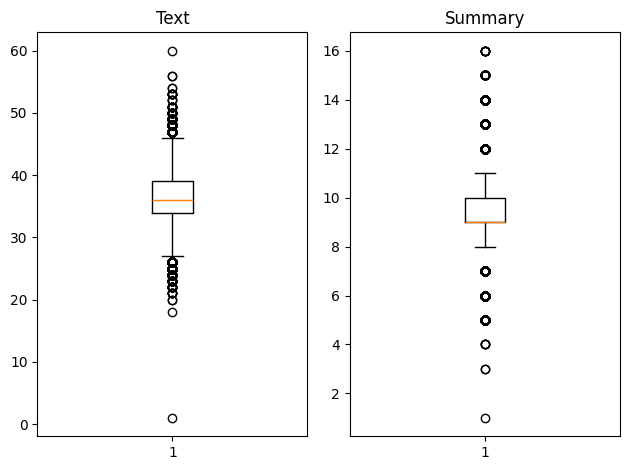

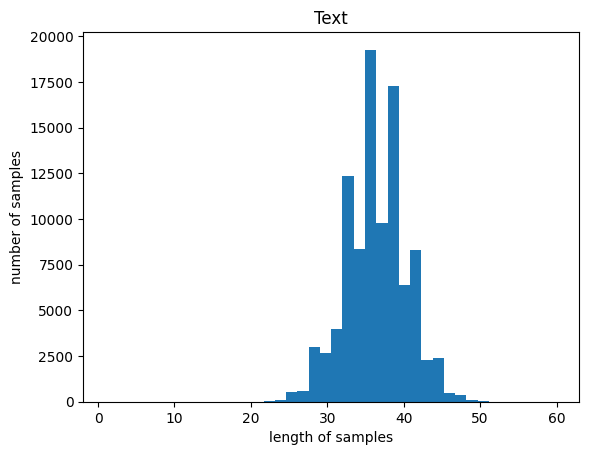

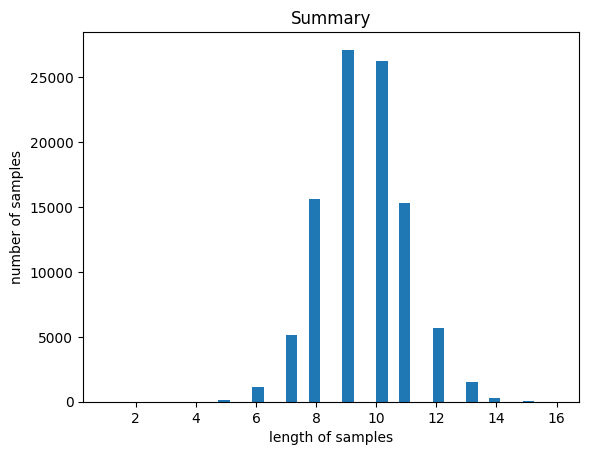

In [29]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [98]:
text_max_len=44
summary_max_len=12

In [31]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
print('=3')

=3


In [99]:
below_threshold_len(text_max_len, data['Text'])
below_threshold_len(summary_max_len,  data['Summary'])

전체 샘플 중 길이가 44 이하인 샘플의 비율: 0.9819845465636438
전체 샘플 중 길이가 12 이하인 샘플의 비율: 0.9818828792191948


In [210]:
data2['Text']=data2['Text'].apply(lambda x : x if len(x.split())<= text_max_len else np.nan)
data2['Summary']=data2['Summary'].apply(lambda x : x if len(x.split())<= summary_max_len else np.nan)
print(data2.isnull().sum())
data2.dropna(axis=0, how='any', inplace=True)

headlines       0
text            0
Text         1770
Summary      1782
dtype: int64


In [104]:
data_proc['Text']=data_proc['Text'].apply(lambda x : x if len(x.split())<= text_max_len else np.nan)
data_proc['Summary']=data_proc['Summary'].apply(lambda x : x if len(x.split())<= summary_max_len else np.nan)
print(data_proc.isnull().sum())
data_proc.dropna(axis=0, how='any', inplace=True)

Text       1770
Summary    1782
dtype: int64


In [105]:
data_proc['decoder_input'] = data_proc['Summary'].apply(lambda x : 'sostoken '+ x)
data_proc['decoder_target'] = data_proc['Summary'].apply(lambda x : x + ' eostoken')

In [119]:
encoder_input = np.array(data_proc['Text']) # 인코더의 입력
decoder_input = np.array(data_proc['decoder_input']) # 디코더의 입력
decoder_target = np.array(data_proc['decoder_target']) # 디코더의 레이블

In [120]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [212]:
summa_data=np.array(data2['text'])

In [213]:
summa_data=summa_data[indices]

In [121]:
n_of_val = int(len(encoder_input)*0.2)
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 75858
훈련 레이블의 개수 : 75858
테스트 데이터의 개수 : 18964
테스트 레이블의 개수 : 18964


In [122]:
source_test=encoder_input[-n_of_val:]

In [214]:
summa_test=summa_data[-n_of_val:]

#2.vocab, 정수인코딩

In [110]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

In [112]:
threshold = 10
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 72577
등장 빈도가 9번 이하인 희귀 단어의 수: 53971
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 18606
단어 집합에서 희귀 단어의 비율: 74.36377915868664
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.778622840971549


In [123]:
src_vocab = 18000
src_tokenizer = Tokenizer(num_words=src_vocab)
src_tokenizer.fit_on_texts(encoder_input_train)

In [124]:
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train)
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[609, 57, 7, 9709, 994, 4242, 1258, 292, 7284, 818, 2023, 3421, 2896, 3177, 1894, 7605, 39, 4518, 1258, 242, 14869, 2327, 1493, 1191, 333, 676, 880, 22, 62, 9709, 994, 1049, 2249], [1858, 4243, 4008, 4815, 523, 243, 63, 3011, 1895, 36, 112, 1306, 630, 259, 5201, 3695, 54, 112, 2307, 2450, 12652, 2096, 259, 112, 6, 852, 233, 11, 794, 3902, 14348, 1746, 1747, 6920], [175, 19, 58, 232, 351, 235, 1290, 242, 135, 2773, 2, 1679, 733, 27, 11, 2843, 4552, 1633, 2870, 96, 19, 628, 1694, 13423, 1742, 351, 1290, 2303, 39, 362, 814, 3648, 4816, 351, 1513]]


In [115]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)
print('=3')

=3


In [125]:
threshold = 11
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 31192
등장 빈도가 10번 이하인 희귀 단어의 수: 20637
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 10555
단어 집합에서 희귀 단어의 비율: 66.16119517825084
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.95963280504009


In [126]:
tar_vocab = 8000
tar_tokenizer = Tokenizer(num_words=tar_vocab)
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train)
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 108, 658, 3192, 13, 1523, 1846, 167, 1754, 4, 677], [1, 806, 342, 2186, 81, 68, 205, 623, 13, 798, 4045], [1, 578, 316, 525, 164, 285, 25, 2858, 4, 9, 65], [1, 1324, 132, 1671, 2621, 81, 11, 449, 49], [1, 2621, 4046, 16, 1481, 3819, 12, 544]]
target
decoder  [[108, 658, 3192, 13, 1523, 1846, 167, 1754, 4, 677, 2], [806, 342, 2186, 81, 68, 205, 623, 13, 798, 4045, 2], [578, 316, 525, 164, 285, 25, 2858, 4, 9, 65, 2], [1324, 132, 1671, 2621, 81, 11, 449, 49, 2], [2621, 4046, 16, 1481, 3819, 12, 544, 2]]


In [50]:
tar_tokenizer.index_word[3]

'eostoken'

In [51]:
special_tokens=['eostoken','sostoken']
def is_useless(sentence):
    actual_tokens = [token for token in sentence if token not in special_tokens]

    if len(actual_tokens) == 0:
        return True

    return all(token == 1 for token in actual_tokens)

In [127]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence)==1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence)==1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 1
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 75857
훈련 레이블의 개수 : 75857
테스트 데이터의 개수 : 18964
테스트 레이블의 개수 : 18964


In [128]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')
print('=3')

=3


#3.model

In [161]:
loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=True, reduction='none')

def masked_loss(y_true, y_pred,label_smoothing=0.1):
    num_classes = tf.shape(y_pred)[-1]
    y_true_one_hot = tf.one_hot(tf.cast(y_true, tf.int32), num_classes)
    y_true_smooth = y_true_one_hot * (1.0 - label_smoothing) + label_smoothing / tf.cast(num_classes, tf.float32)
    loss = loss_object(y_true_smooth, y_pred)
    mask = tf.cast(tf.not_equal(y_true, 0), dtype=loss.dtype)
    loss = loss * mask
    return tf.reduce_sum(loss) / tf.reduce_sum(mask)

In [251]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Lambda, Bidirectional,Dropout,Add
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 인코더 설계 시작
embedding_dim = 160
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_embed_layer = Embedding(src_vocab, embedding_dim, mask_zero=True)
enc_emb=enc_embed_layer(encoder_inputs)
#encoder_mask = Lambda(lambda x: tf.cast(x, tf.bool))(enc_embed_layer.compute_mask(encoder_inputs))
enc_emb = Dropout(0.3)(enc_emb)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = Bidirectional(LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout=0.4))
encoder_output1, forward_h1, forward_c1, backward_h1, backward_c1 = encoder_lstm1(enc_emb)

encoder_lstm2 = Bidirectional(LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4,recurrent_dropout=0.4))
encoder_output2, forward_h2, forward_c2, backward_h2, backward_c2 = encoder_lstm2(encoder_output1)

encoder_lstm3 = Bidirectional(LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4,recurrent_dropout=0.4),merge_mode='sum')
encoder_output3_mask, forward_h, forward_c, backward_h, backward_c = encoder_lstm3(encoder_output2)

state_h3 = Add()([forward_h, backward_h])
state_c3 = Add()([forward_c, backward_c])
encoder_output3 = Lambda(lambda x: x)(encoder_output3_mask)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'lambda_58' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [252]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim,mask_zero=True)
#decoder_mask = Lambda(lambda x: tf.cast(x, tf.bool))(dec_emb_layer.compute_mask(decoder_inputs))
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs_mask, _, _ = decoder_lstm(dec_emb, initial_state=[state_h3, state_c3])
decoder_outputs = Lambda(lambda x: x)(decoder_outputs_mask)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'lambda_59' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [164]:
# 디코더의 출력층
decoder_layer = Dense(embedding_dim)
decoder_layer_outputs = decoder_layer(decoder_outputs)

embedding_matrix = dec_emb_layer.embeddings
logits = Lambda(lambda x: tf.matmul(x, embedding_matrix, transpose_b=True))(decoder_layer_outputs)  # (batch, time, vocab_size)
decoder_softmax_outputs = Lambda(lambda x: tf.nn.softmax(x))(logits)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24      │ (None, 44)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_21        │ (None, 44, 160)   │  2,880,000 │ input_layer_24[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 44, 160)   │          0 │ embedding_21[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_22        │ (None, 44)        │          0 │ input_layer_24[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_21    │ [(None, 44, 512), │    854,016 │ dropout_7[0][0],  │
│ (Bidirectional)     │ (None, 256),      │            │ not_equal_22[0][… │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_25      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_22    │ [(None, 44, 256), │  1,574,912 │ bidirectional_21… │
│ (Bidirectional)     │ (None, 256),      │            │ not_equal_22[0][… │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_22        │ (None, None, 160) │  1,280,000 │ input_layer_25[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 256)       │          0 │ bidirectional_22… │
│                     │                   │            │ bidirectional_22… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_7 (Add)         │ (None, 256)       │          0 │ bidirectional_22… │
│                     │                   │            │ bidirectional_22… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_41 (LSTM)      │ [(None, None,     │    427,008 │ embedding_22[0][… │
│                     │ 256), (None,      │            │ add_6[0][0],      │
│                     │ 256), (None,      │            │ add_7[0][0]       │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_23        │ (None, None)      │          0 │ input_layer_25[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_42 (Lambda)  │ (None, None, 256) │          0 │ lstm_41[0][0],    │
│                     │                   │            │ not_equal_23[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, None, 160) │     41,120 │ lambda_42[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_43 (Lambda)  │ (None, None,      │          0 │ dense_24[0][0]  

 Total params: 7,057,056 (26.92 MB)

 Trainable params: 7,057,056 (26.92 MB)

 Non-trainable params: 0 (0.00 B)

In [253]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_output3], mask=None)


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

decoder_layer = Dense(embedding_dim)
decoder_layer_outputs = decoder_layer(decoder_concat_input)

embedding_matrix = dec_emb_layer.embeddings
logits = Lambda(lambda x: tf.matmul(x, embedding_matrix, transpose_b=True))(decoder_layer_outputs)  # (batch, time, vocab_size)
#decoder_softmax_outputs = Lambda(lambda x: tf.nn.softmax(x))(logits)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], logits)
model.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_37      │ (None, 44)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_28        │ (None, 44, 160)   │  2,880,000 │ input_layer_37[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 44, 160)   │          0 │ embedding_28[0][… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_31        │ (None, 44)        │          0 │ input_layer_37[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_29    │ [(None, 44, 512), │    854,016 │ dropout_11[0][0], │
│ (Bidirectional)     │ (None, 256),      │            │ not_equal_31[0][… │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_30    │ [(None, 44, 512), │  1,574,912 │ bidirectional_29… │
│ (Bidirectional)     │ (None, 256),      │            │ not_equal_31[0][… │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_38      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_31    │ [(None, 44, 256), │  1,574,912 │ bidirectional_30… │
│ (Bidirectional)     │ (None, 256),      │            │ not_equal_31[0][… │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256),      │            │                   │
│                     │ (None, 256)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_29        │ (None, None, 160) │  1,280,000 │ input_layer_38[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_14 (Add)        │ (None, 256)       │          0 │ bidirectional_31… │
│                     │                   │            │ bidirectional_31… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_15 (Add)        │ (None, 256)       │          0 │ bidirectional_31… │
│                     │                   │            │ bidirectional_31… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_53 (LSTM)      │ [(None, None,     │    427,008 │ embedding_29[0][… │
│                     │ 256), (None,      │            │ add_14[0][0],     │
│                     │ 256), (None,      │            │ add_15[0][0]      │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_32        │ (None, None)      │          0 │ input_layer_38[0… │
│ (NotEqual)          │                   │            │                 

 Total params: 8,673,184 (33.09 MB)

 Trainable params: 8,673,184 (33.09 MB)

 Non-trainable params: 0 (0.00 B)

#3.학습

In [254]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [255]:
model.compile(optimizer='Adam', loss=masked_loss)
es = EarlyStopping(monitor='val_loss', patience=8, verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.75, patience=2, min_lr=1e-6)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es,reduce_lr], epochs=200)

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'lambda_60' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


297/297 ━━━━━━━━━━━━━━━━━━━━ 249s 757ms/step - loss: 7.4636 - val_loss: 6.8752 - learning_rate: 0.0010
Epoch 2/200
297/297 ━━━━━━━━━━━━━━━━━━━━ 223s 750ms/step - loss: 6.7677 - val_loss: 6.3382 - learning_rate: 0.0010
Epoch 3/200
297/297 ━━━━━━━━━━━━━━━━━━━━ 220s 742ms/step - loss: 6.2515 - val_loss: 5.9755 - learning_rate: 0.0010
Epoch 4/200
297/297 ━━━━━━━━━━━━━━━━━━━━ 222s 746ms/step - loss: 5.8960 - val_loss: 5.7261 - learning_rate: 0.0010
Epoch 5/200
297/297 ━━━━━━━━━━━━━━━━━━━━ 223s 752ms/step - loss: 5.6363 - val_loss: 5.5503 - learning_rate: 0.0010
Epoch 6/200
297/297 ━━━━━━━━━━━━━━━━━━━━ 225s 757ms/step - loss: 5.4263 - val_loss: 5.3929 - learning_rate: 0.0010
Epoch 7/200
297/297 ━━━━━━━━━━━━━━━━━━━━ 223s 751ms/step - loss: 5.2380 - val_loss: 5.2407 - learning_rate: 0.0010
Epoch 8/200
297/297 ━━━━━━━━━━━━━━━━━━━━ 223s 751ms/step - loss: 5.0675 - val_loss: 5.1226 - learning_rate: 0.0010
Epoch 9/200
297/297 ━━━━━━━━━━━━━━━━━━━━ 220s 741ms/step - loss: 4.9119 - val_loss: 5.0448 -

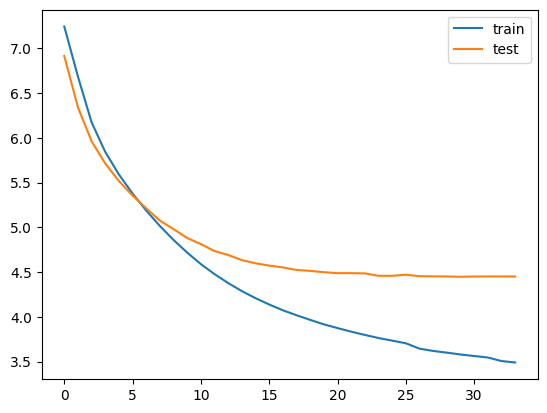

In [173]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

#4.inference

In [174]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [183]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_output3, state_h3, state_c3])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2_mask = dec_emb_layer(decoder_inputs)
dec_emb2 = Lambda(lambda x: x)(dec_emb2_mask)
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

print('=3')

=3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:938: UserWarning: Layer 'lambda_54' (of type Lambda) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


In [184]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_layer_outputs_inf = decoder_layer(decoder_inf_concat)

embedding_matrix_if = dec_emb_layer.embeddings
logits_inf = Lambda(lambda x: tf.matmul(x, embedding_matrix_if, transpose_b=True),output_shape=())(decoder_layer_outputs_inf)  # (batch, time, vocab_size)
decoder_softmax_outputs = Lambda(lambda x: tf.nn.softmax(x))(logits_inf)

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_softmax_outputs] + [state_h2, state_c2])

print('=3')

=3


In [177]:
def extract_numbers(text):
    numbers = re.findall(r'\d+\.?\d*', text)
    return [int(num) for num in numbers]

def find_nearest_number(predicted_number, source_numbers):
    predicted_number = int(predicted_number)
    if not source_numbers:
        return predicted_number
    nearest = min(source_numbers, key=lambda x: abs(x - predicted_number))
    return nearest

def recover_numbers(decoded_sentence, source_text):
    source_numbers = extract_numbers(source_text)
    words = decoded_sentence.split()
    recovered_words = []

    for word in words:
        if word.isdigit():
            nearest_number = find_nearest_number(word, source_numbers)
            recovered_words.append(str(nearest_number))
        else:
            recovered_words.append(word)

    return ' '.join(recovered_words)

In [191]:
def decode_sequence(input_seq, input_sentence,beam_size=5, alpha=0.7):
  # 입력으로부터 인코더의 상태를 얻음
  e_out, e_h, e_c = encoder_model.predict(input_seq)
  start_token = tar_word_to_index['sostoken']
  end_token = tar_word_to_index['eostoken']

    # <SOS>에 해당하는 토큰 생성
  target_seq = np.zeros((1,1))
  target_seq[0, 0] = tar_word_to_index['sostoken']

  stop_condition = False
  decoded_sentence = ''
  while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

    output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
    sampled_token_index = np.argmax(output_tokens[0, -1, :])
    if sampled_token_index == 0 :
      stop_condition = True
      break
    sampled_token = tar_index_to_word[sampled_token_index]
    if (sampled_token!='eostoken'):
      decoded_sentence += ' '+sampled_token

    #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
    if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
      stop_condition = True

    # 길이가 1인 타겟 시퀀스를 업데이트
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = sampled_token_index

    # 상태를 업데이트 합니다.
    e_h, e_c = h, c

  decoded_sentence = recover_numbers(decoded_sentence, input_sentence)

  return decoded_sentence
print('=3')

=3


In [247]:
from summa.summarizer import summarize

def extractive_summary(text, word=summary_max_len-1):
    try:
        summary = summarize(text, words=word)
        if not summary:
            return 'extractive fail'
        return summary
    except:
        return 'extractive fail'

In [248]:
def decode_sequence2(input_seq, input_sentence, raw_sentence,beam_size=5, alpha=0.6):
  # 입력으로부터 인코더의 상태를 얻음
  e_out, e_h, e_c = encoder_model.predict(input_seq)
  start_token = tar_word_to_index['sostoken']
  end_token = tar_word_to_index['eostoken']

  # 초기 beam: [(시퀀스, 누적 log prob, (h, c))]
  beams = [([start_token], 0.0, (e_h, e_c))]
  stop_beams = []

  while beams:
    new_beams = []

    for seq, score, (h, c) in beams:
      target_seq = np.zeros((1,1))
      target_seq[0,0] = seq[-1]

      output_tokens, next_h, next_c = decoder_model.predict([target_seq] + [e_out, h, c],verbose=0)

      # 상위 beam_size개 후보를 고른다
      top_indices = output_tokens[0, -1, :].argsort()[-beam_size:][::-1]

      for idx in top_indices:
        token_prob = output_tokens[0, -1, idx]
        token_log_prob = np.log(token_prob + 1e-9)
        new_seq = seq + [idx]
        new_score = score + token_log_prob

        if idx == seq[-1]:
          continue
        if idx==0 or idx == end_token or len(new_seq) >= summary_max_len:
          stop_beams.append((new_seq, new_score))
        else:
          new_beams.append((new_seq, new_score, (next_h, next_c)))

    beams = sorted(new_beams, key=lambda x: x[1]/(len(x[0])**alpha), reverse=True)[:beam_size]

  best_seq, best_score = sorted(stop_beams, key=lambda x: x[1]/(len(x[0])**alpha), reverse=True)[0]
  decoded_sentence = ' '.join([tar_index_to_word[idx] for idx in best_seq if idx!=0 and idx != start_token and idx != end_token])
  print(best_score)
  decoded_sentence = recover_numbers(decoded_sentence, input_sentence)
  print("추출 요약 :",extractive_summary(raw_sentence))
  return decoded_sentence
print('=3')

=3


In [181]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0) and (i!=1) and (i!=2):
            temp = temp + tar_index_to_word[i]+' '
    return temp

print('=3')

=3


In [219]:
def clean_for_summa(text):
    text = re.sub(r'\s+', ' ', text)  # 여러 공백 하나로
    text = text.replace('\n', ' ')    # 개행 제거
    text = re.sub(r'[^\w\s\.\,\?\!\(\)]', '', text)  # 문자/공백/문장부호만 살림
    return text.strip()

In [220]:
clean_summa=[]
for i in summa_test:
  clean_summa.append(clean_for_summa(i))

In [222]:
clean_summa[3]

'Amazon has become the first foreign ecommerce firm to start its own food retail venture in India called Amazon Retail, piloting its services in Pune. It will reportedly be available on Amazon India platform and sell locally made and packaged food to the consumers directly. Amazon also has Amazon Now app, which connects retailers with customers for sale of groceries.'

In [249]:
for i in range(70, 120):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence2(encoder_input_test[i].reshape(1, text_max_len),source_test[i],clean_summa[i]))
    print("\n")

원문 : singer sung movies like chennai express recently tweeted robbed united states said thief smashed glass car took away laptop belongings added local police said incidents common 
실제 요약 : chennai express singer gets robbed in us 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
-9.2852545
추출 요약 : Chinmayi added that the local police said such incidents were common.
예측 요약 : was robbed in us train accident singer


원문 : 117 year old japanese woman died july 22 days applications titles oldest person living oldest person living approved born region japan may 117 years 81 days old died new record holder yet confirmed 
실제 요약 : world oldest person aged dies days after record confirmed 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
-8.467757
추출 요약 : extractive fail
예측 요약 : japanese woman dies after being named


원문 : delhi high court today sentenced bollywood actor rajpal yadav three months civil prison failing repay loan crore actor wife radha taken loan directorial debut back 2010 film released 2012 unsucce

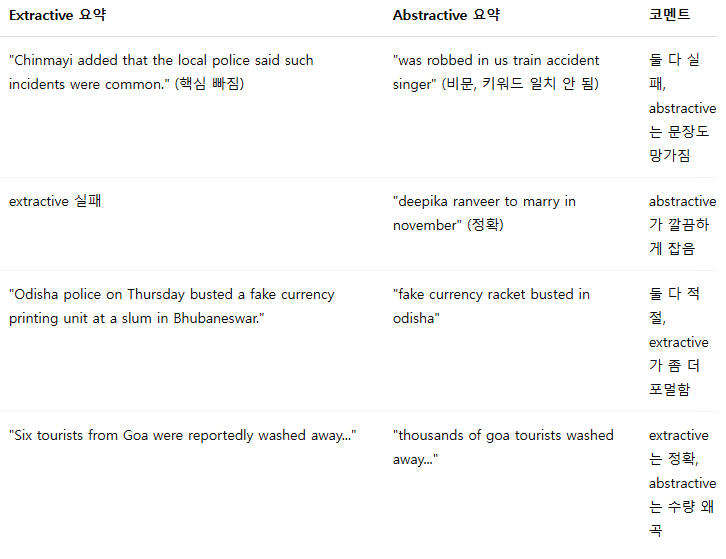

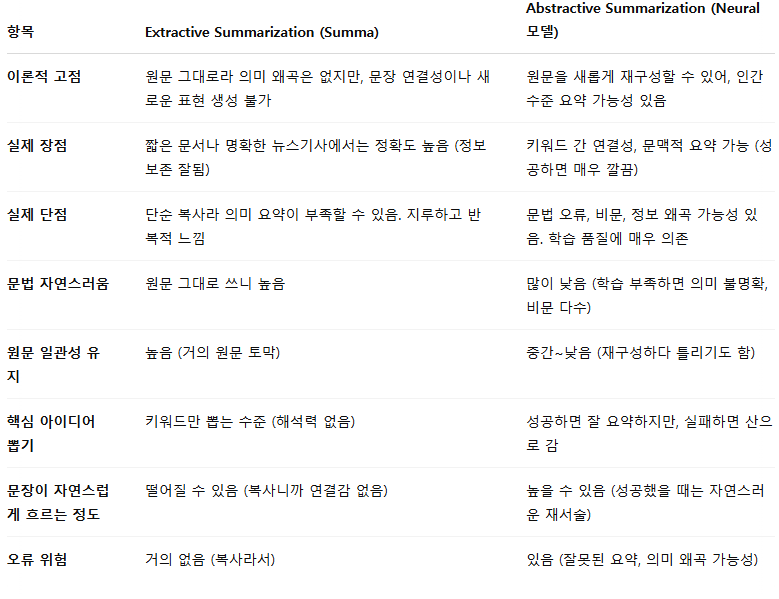